# Group 8

## Introduction


We have chosen to work on the User Knowledge data set, which contains data related to student's knowledge status of Electrical DC Machines. The dataset contains five variables that can possibly affect the user knowledge level, STG (degree of study time for goal object materials), SCG (degree of repetition number of users for goal object materials), STR (degree of study time of user for related objects with goal object), LPR (exam performance of user for related objects with goal object), PEG (exam performance of user for goal objects), and UNS (knowledge level of user). 

We will be attempting to answer a classification problem: **Given these 5 variables, what is the most probable knowledge level of a given user?**

## Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(httr)
library(dplyr)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### The following code pulls the training data from the internet into our notebook:

In [6]:
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile = "downloadfile.xls", method = "wget")

user_knowledge_training <- read_excel('downloadfile.xls', sheet = 2, range="A1:F259")  # the second sheet is training data
user_knowledge_training

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


1. We can use the training data to create a table showing the number of observations for each class of UNS.

In [3]:
user_knowledge_class <- user_knowledge_training |> group_by(UNS) |> summarize(Number_of_Observations = n())
user_knowledge_class

UNS,Number_of_Observations
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


2. We can also see the mean values of each of the variables

In [4]:
user_knowledge_average <- user_knowledge_training |> select(STG:PEG) |> map_df(mean)
user_knowledge_average

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


For any given 5 variables, there are 10 possible combinations if we choose to plot one against another. Here are all the possible 2 variable combinations on plots:

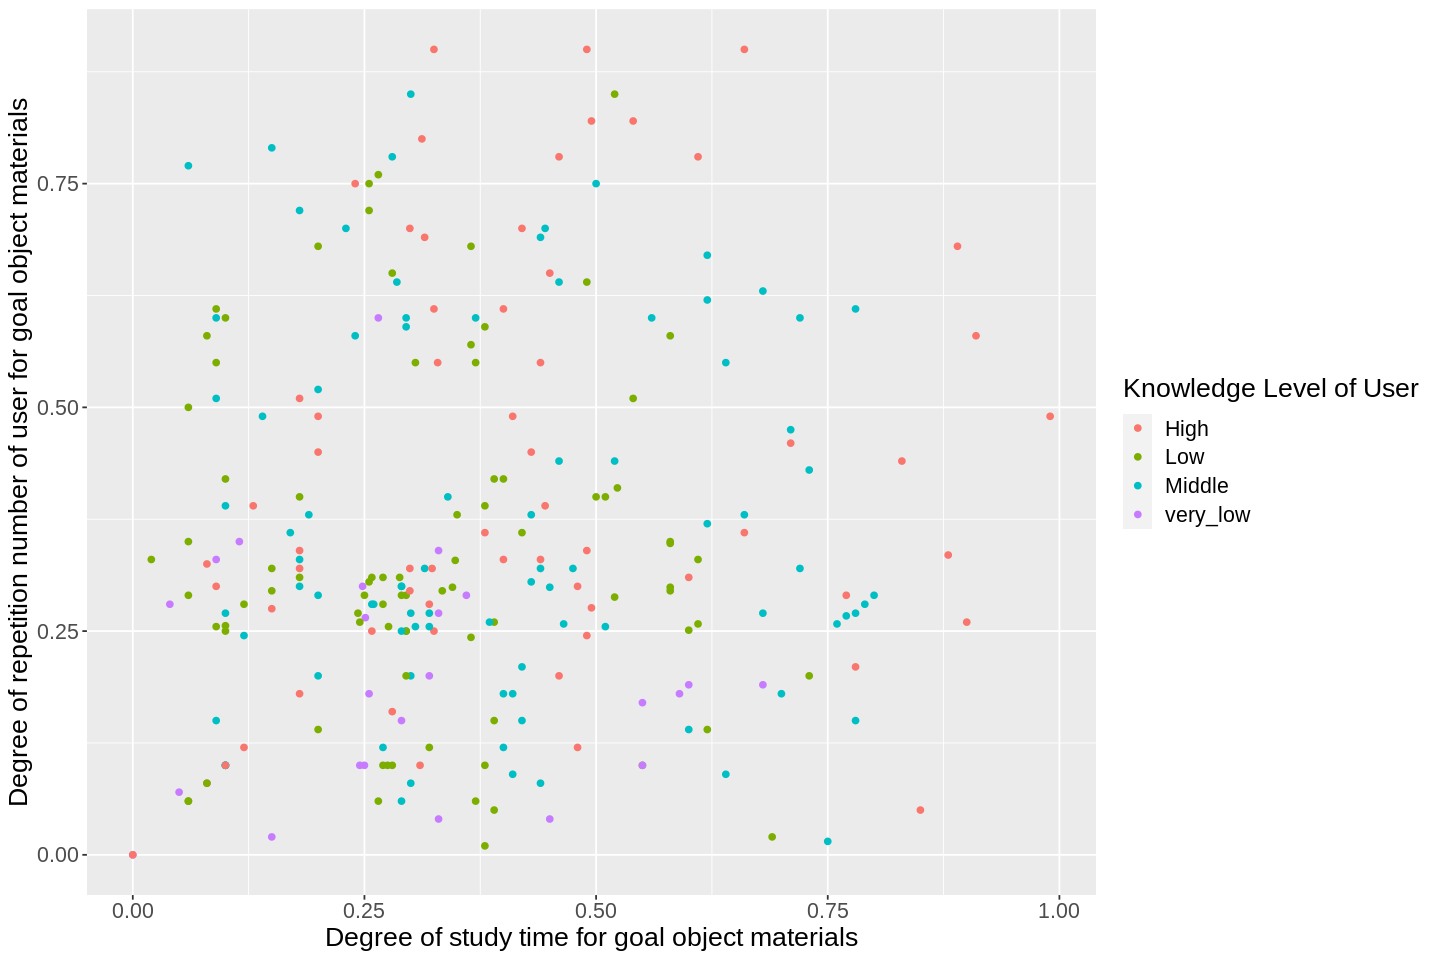

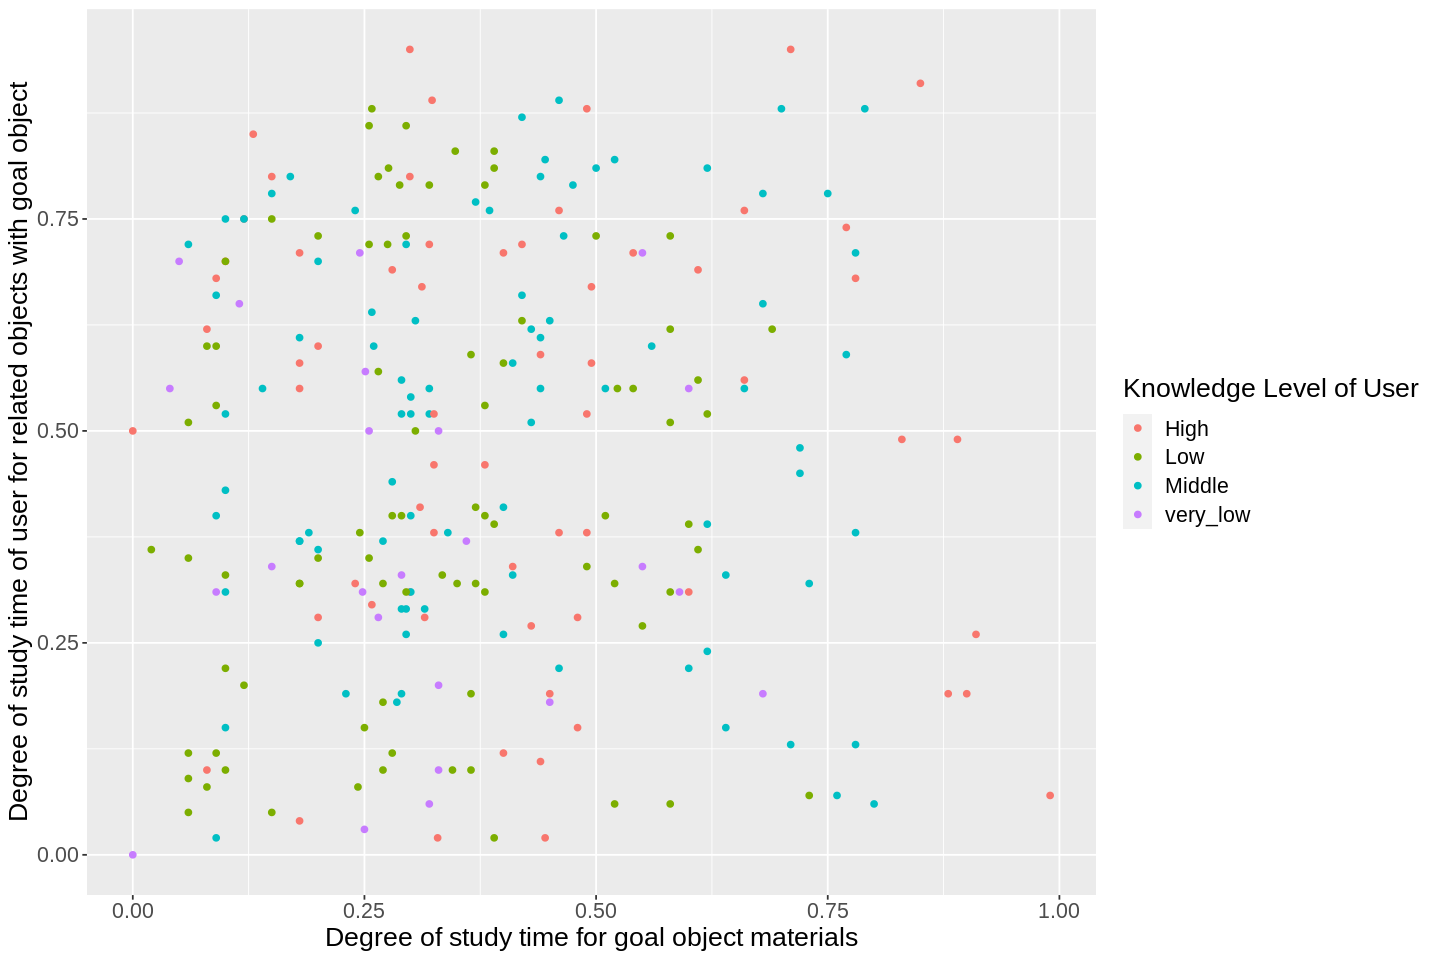

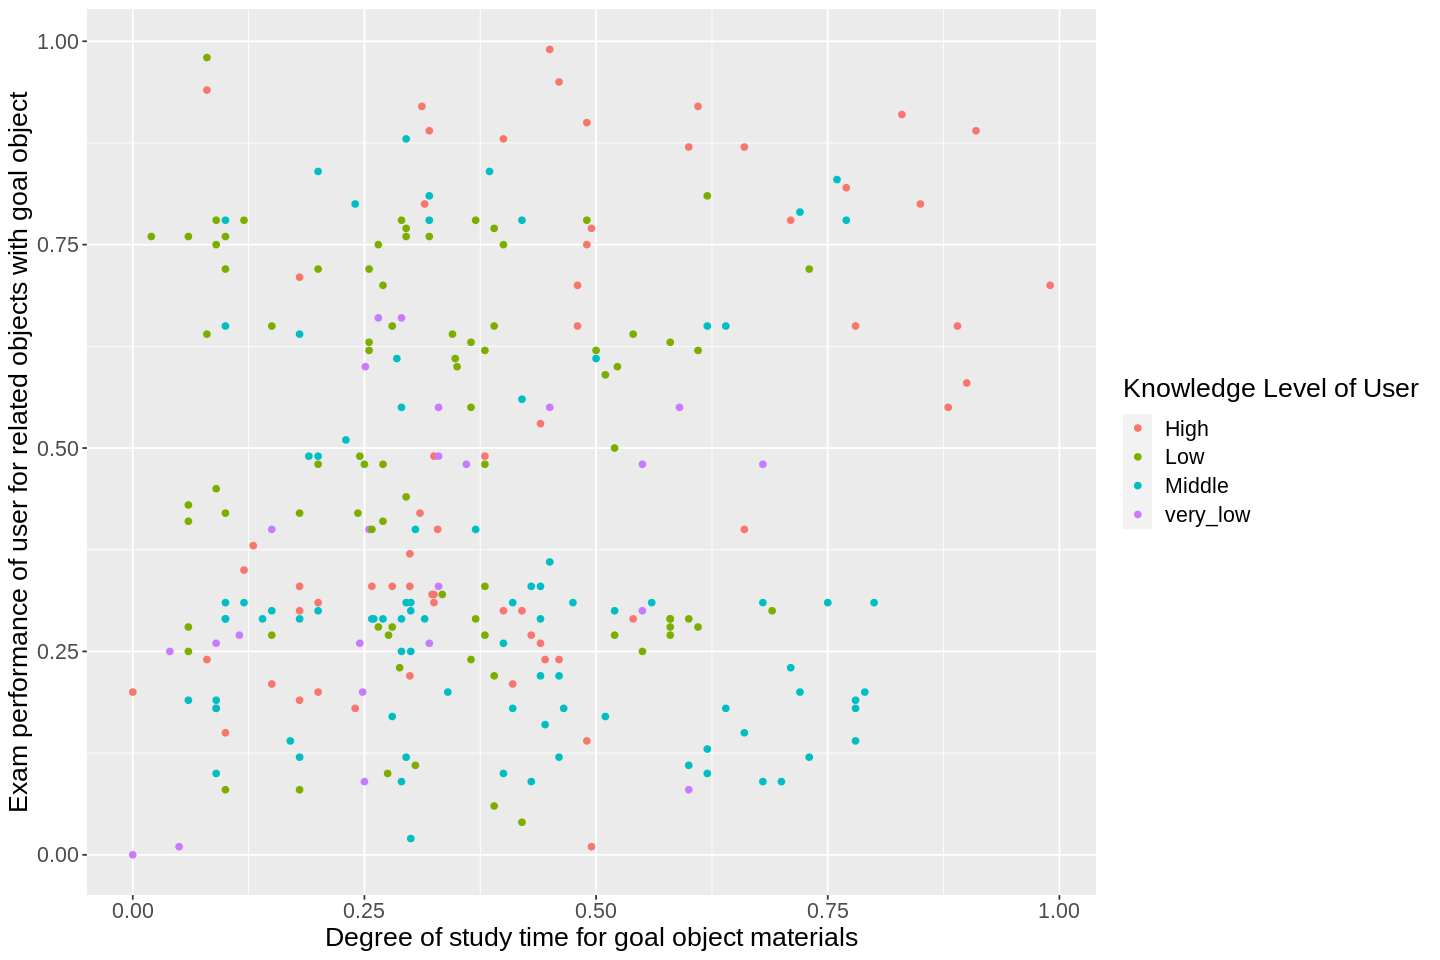

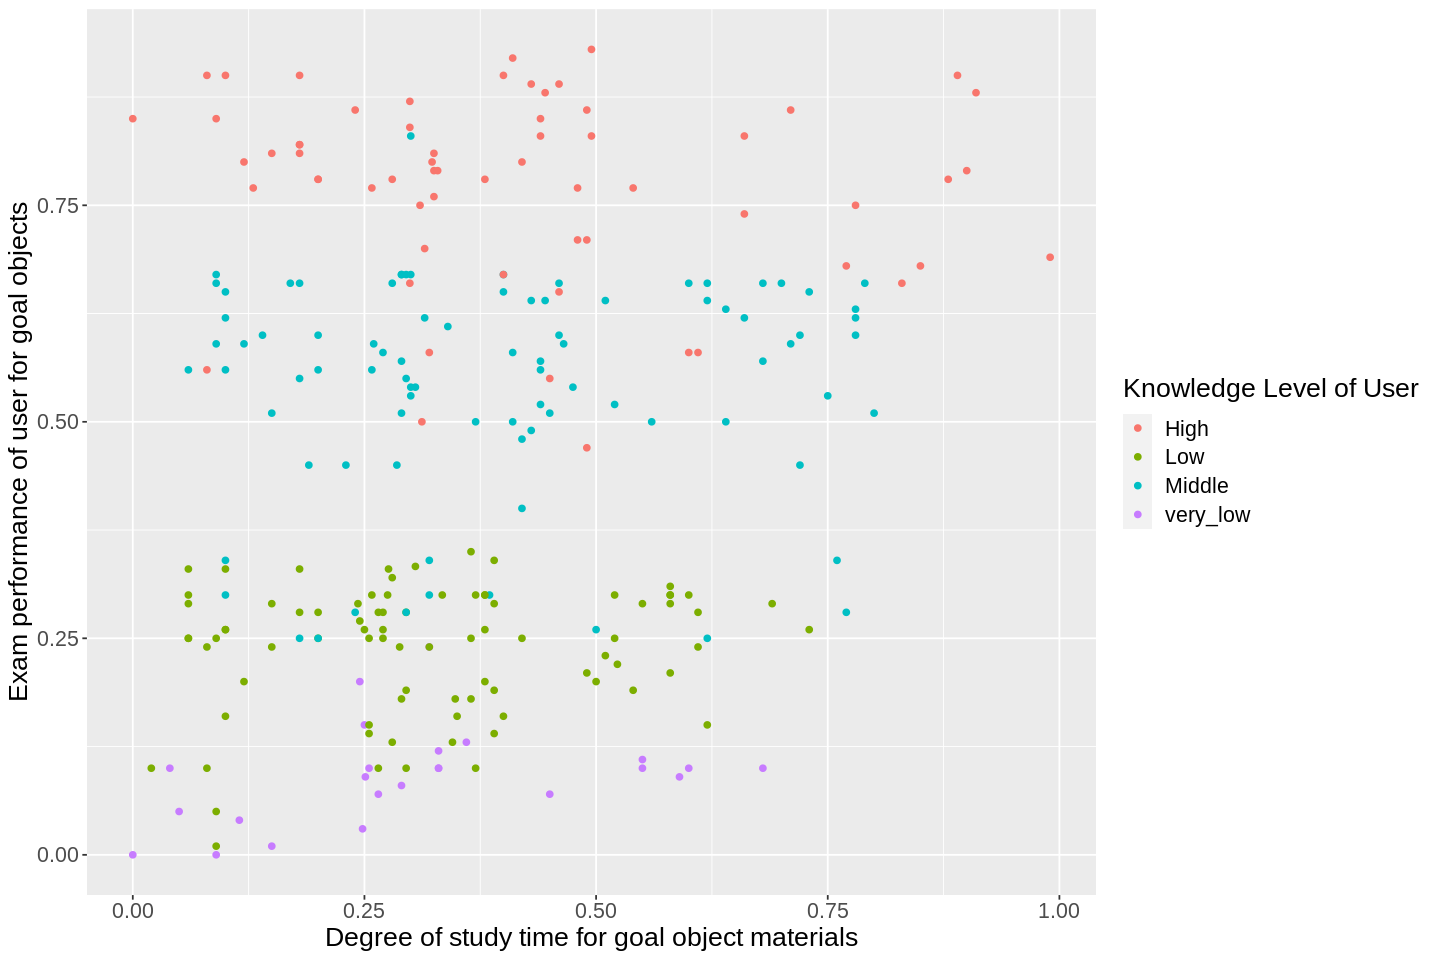

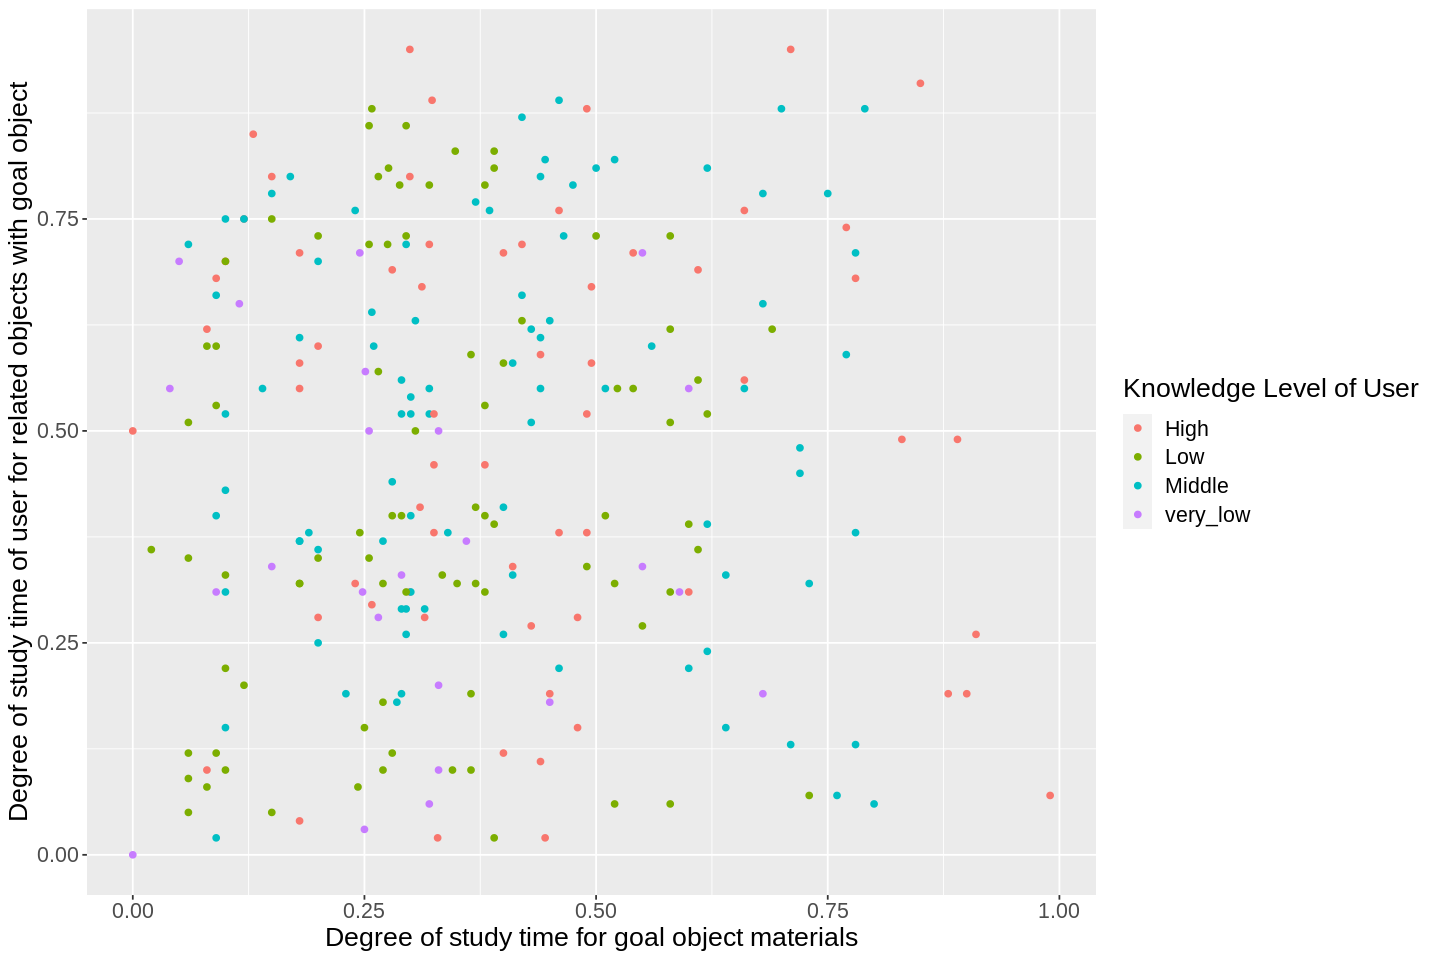

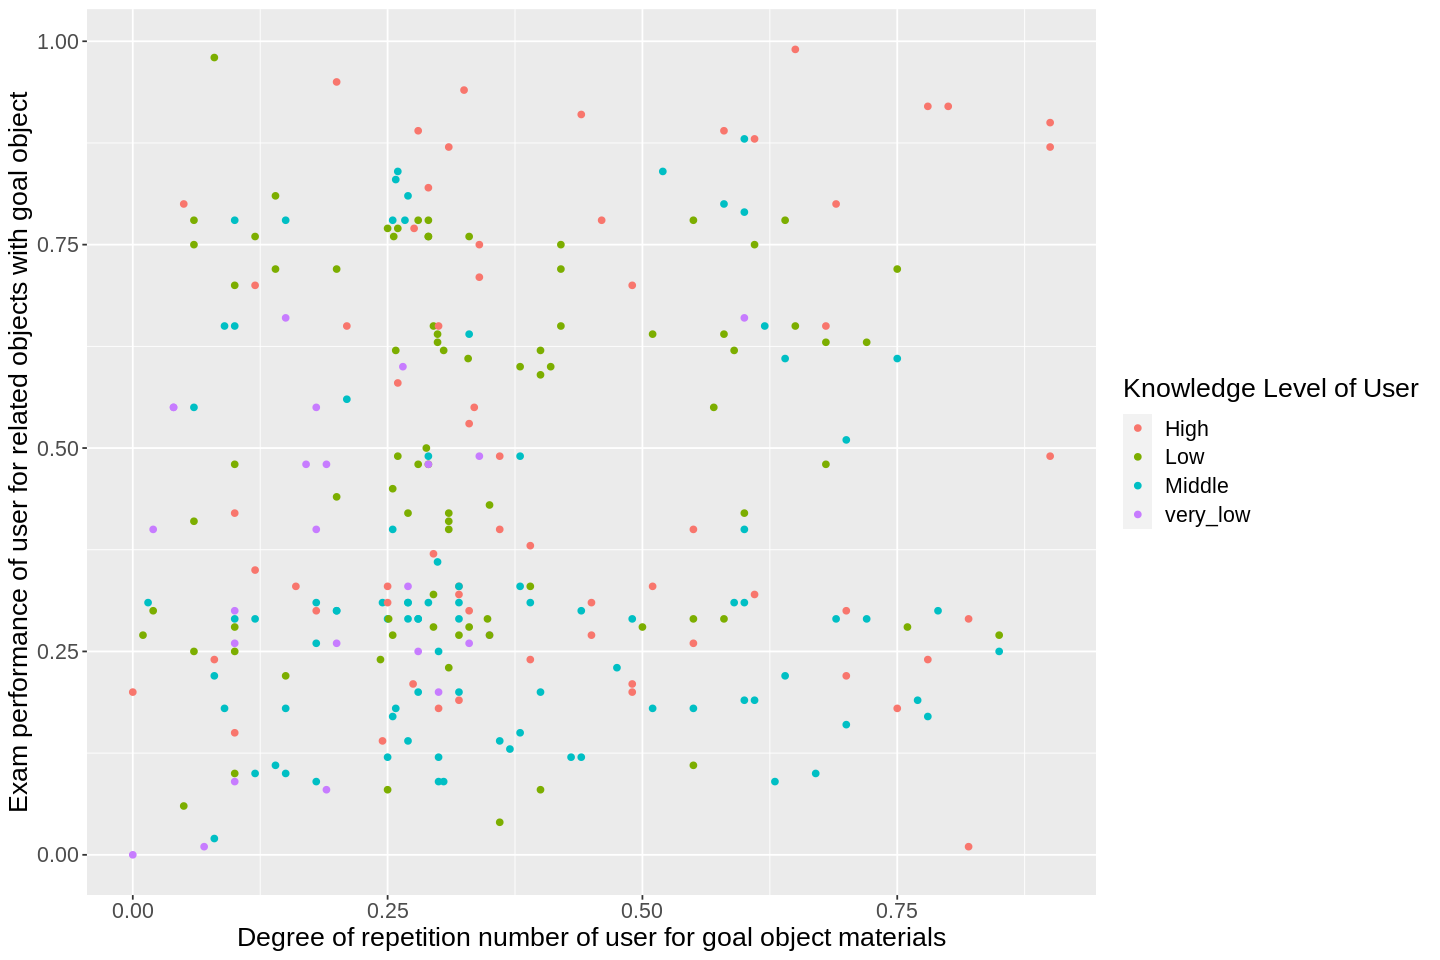

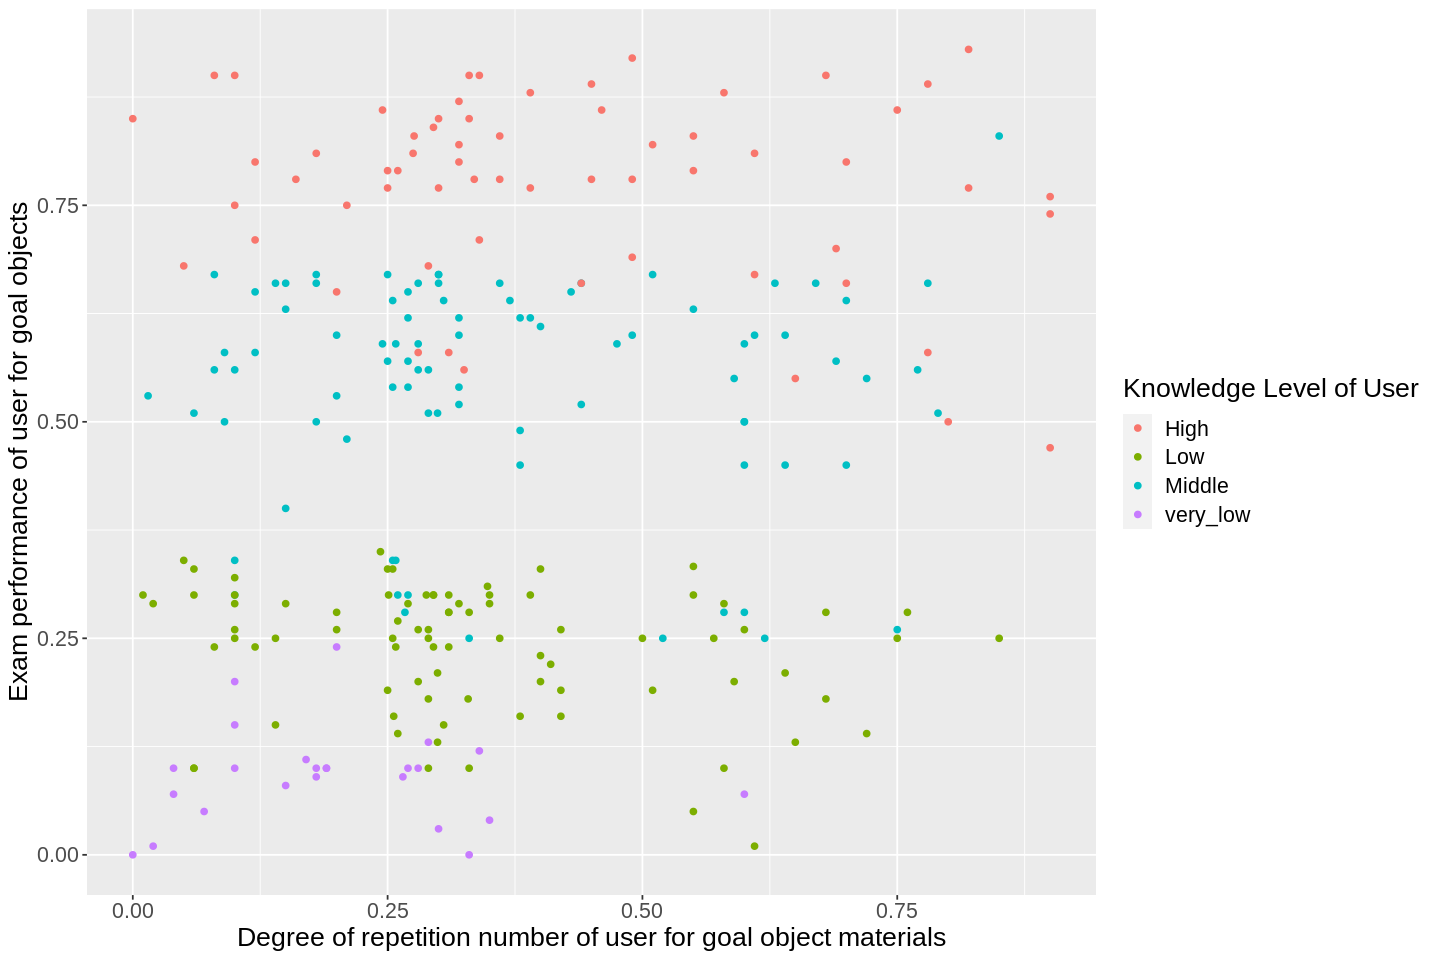

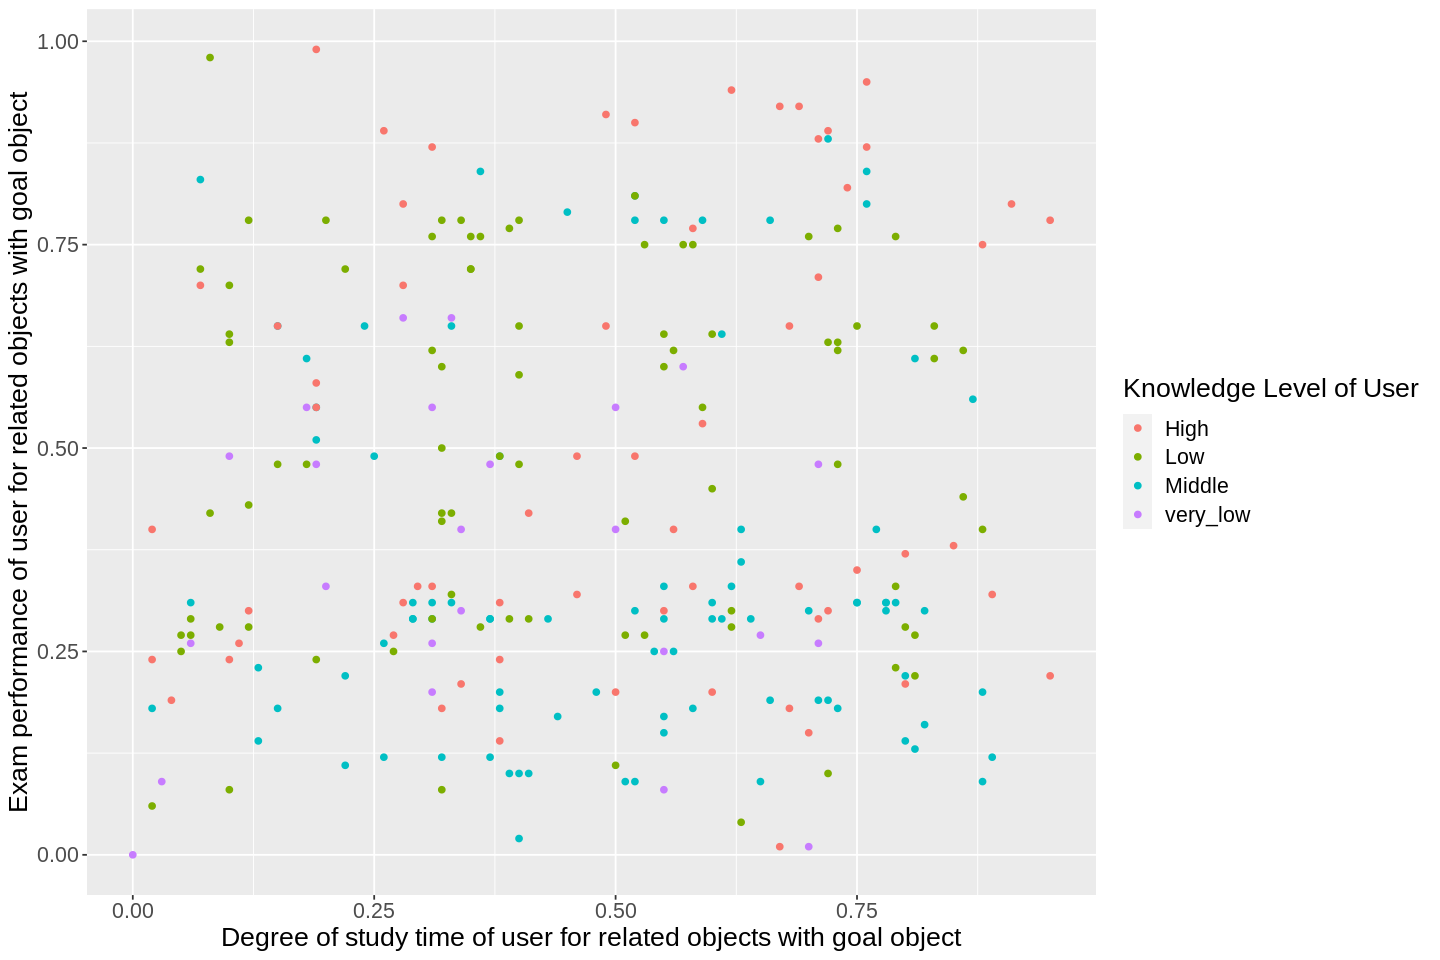

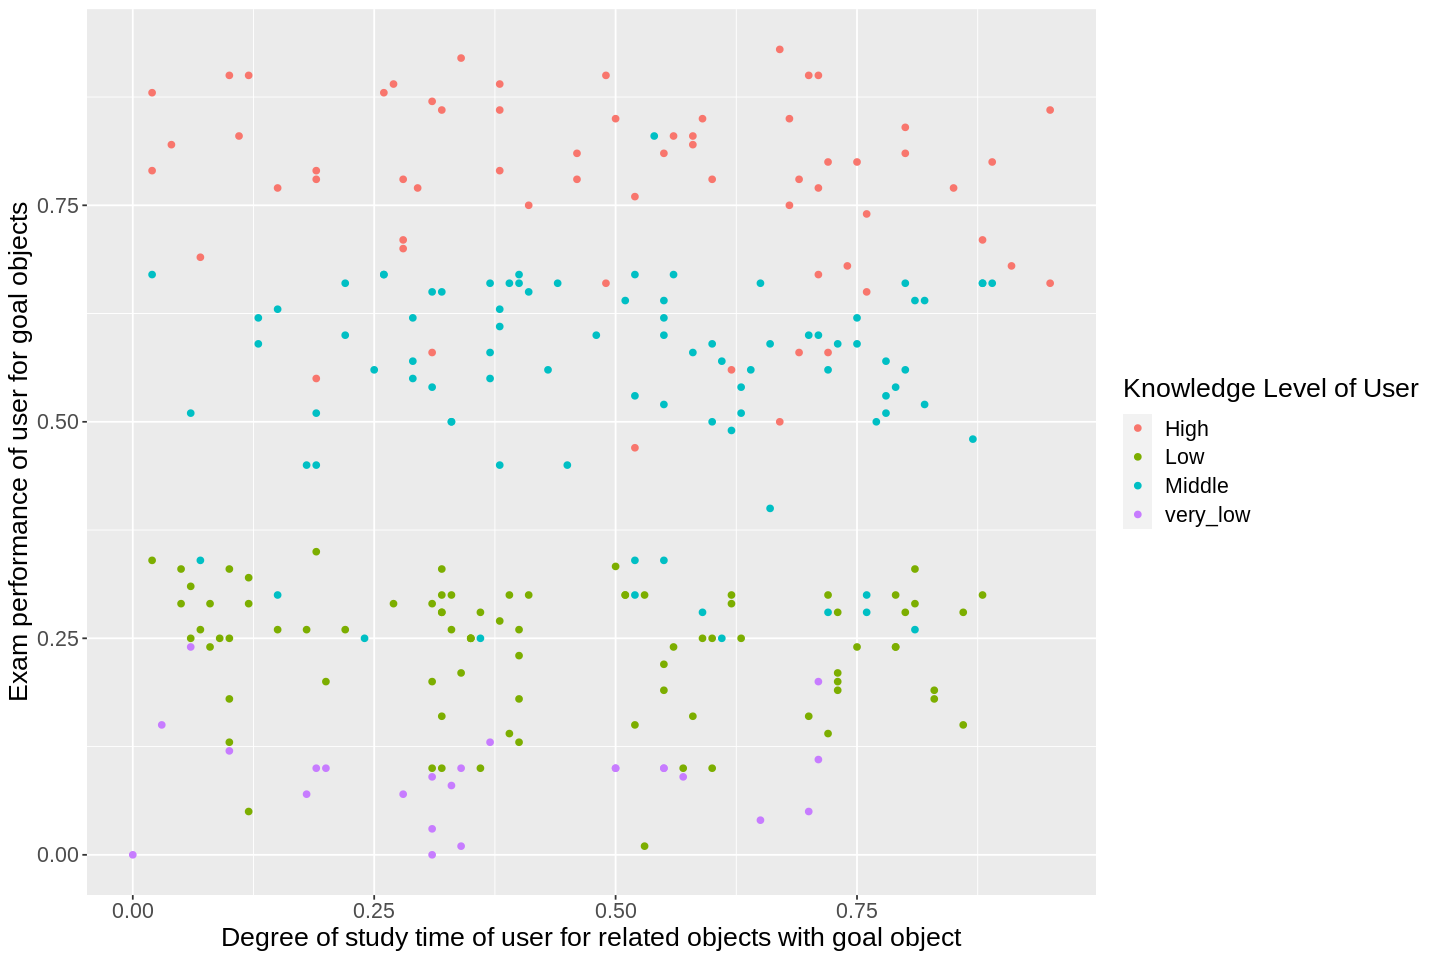

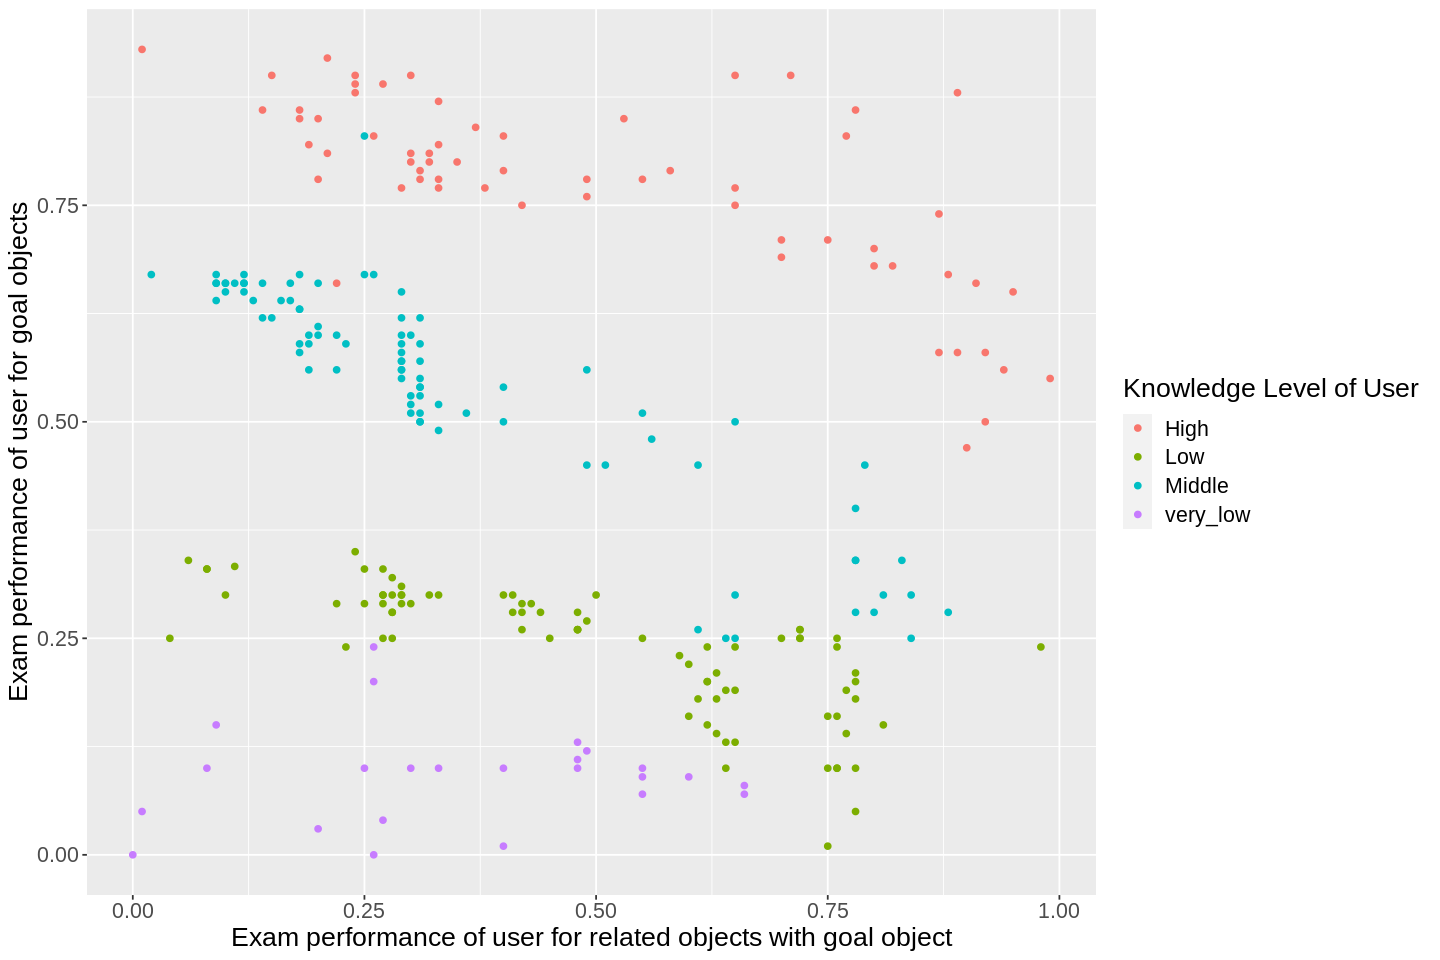

In [5]:
options(repr.plot.width = 12, repr.plot.height = 8)
TEXT_SIZE <- 16
stg_vs_scg <- 
    ggplot(data = user_knowledge_training, aes(x = STG, y = SCG, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of study time for goal object materials", 
        y = "Degree of repetition number of user for goal object materials",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
stg_vs_scg

stg_vs_str <- 
    ggplot(data = user_knowledge_training, aes(x = STG, y = STR , color = UNS)) + 
        geom_point() +
        labs (x = "Degree of study time for goal object materials", 
        y = "Degree of study time of user for related objects with goal object",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
stg_vs_str

stg_vs_lpr <- 
    ggplot(data = user_knowledge_training, aes(x = STG, y = LPR, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of study time for goal object materials", 
        y = "Exam performance of user for related objects with goal object",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
stg_vs_lpr

stg_vs_peg <- 
    ggplot(data = user_knowledge_training, aes(x = STG, y = PEG, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of study time for goal object materials", 
        y = "Exam performance of user for goal objects",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
stg_vs_peg


scg_vs_str <- 
    ggplot(data = user_knowledge_training, aes(x = SCG, y = STR , color = UNS)) + 
        geom_point() +
        labs (x = "Degree of repetition number of user for goal object materials", 
        y = "Degree of study time of user for related objects with goal object",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
stg_vs_str

scg_vs_lpr <- 
    ggplot(data = user_knowledge_training, aes(x = SCG, y = LPR, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of repetition number of user for goal object materials", 
        y = "Exam performance of user for related objects with goal object",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
scg_vs_lpr

scg_vs_peg <- 
    ggplot(data = user_knowledge_training, aes(x = SCG, y = PEG, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of repetition number of user for goal object materials", 
        y = "Exam performance of user for goal objects",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
scg_vs_peg


str_vs_lpr <- 
    ggplot(data = user_knowledge_training, aes(x = STR, y = LPR, color = UNS)) + 
        geom_point() +
        labs (x ="Degree of study time of user for related objects with goal object", 
        y = "Exam performance of user for related objects with goal object",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
str_vs_lpr

str_vs_peg <- 
    ggplot(data = user_knowledge_training, aes(x = STR, y = PEG, color = UNS)) + 
        geom_point() +
        labs (x = "Degree of study time of user for related objects with goal object", 
        y = "Exam performance of user for goal objects",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
str_vs_peg

lpr_vs_peg <- 
    ggplot(data = user_knowledge_training, aes(x = LPR, y = PEG, color = UNS)) + 
        geom_point() +
        labs (x = "Exam performance of user for related objects with goal object", 
        y = "Exam performance of user for goal objects",
             colour = "Knowledge Level of User")+
        theme(text = element_text(size=TEXT_SIZE))
lpr_vs_peg

## Methods:
#### Out of the following columns:
- STG (The degree of study time for goal object materials)
- SCG (The degree of repetition number of user for goal object materials)
- STR (The degree of study time of user for related objects with goal object)
- LPR (The exam performance of user for related objects with goal object)
- PEG (The exam performance of user for goal objects)

> UNS (The knowledge level of user), is our target value for classification

We will be using LPR and PEG to classify our target value. We have decided on these two attributes as these two variables produce the most distinct boundaries between different knowledge level regions when plotted out on a scatter plot, as shown by the previous data analysis. Moreover, unlike some of the other plots with clear groupings, the plot of LPR to PEG clearly demostrates now both variables may affect the classification, as opposed to having horizonatal stripes which demostrates that only one of the two variables affect the classification, while the other has little to no impact.

Since we going to use two variables to classify knowledge level, it will be easy to visualize the results on a 2D scatterplot diagram.

## Expected outcomes and significance:
- We expect to find that exam better performace should be most correlated with higher user knowledge level based on our plots.
- If we want to predict how competetent users will be based on exam performace, a model will be able to classify any given user more easily than just having a human to interpret these values by hand.
- Some questions that may be raised are whether or not study time has an significant effect on user knowledge despite the apparent lack of corrolation on the plots.